# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

## Directories

In [2]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [4]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [5]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [6]:


# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [7]:
# Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [8]:
# Train_data_vis.examine_dataset()

In [9]:
# Train_data_vis.histogram_dataset()

In [10]:
# Train_data_vis.correlation_plots()

In [11]:
# Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [12]:
# for i in range(10):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [13]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()

# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.92
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8101999993
sum of background 2860861.8102
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with nthread=32, will be overridden by n_jobs=32. Current value: num_threads=32
[*] --- Predicting Train set
[*] --- AUC train : 0.857753956335858
[*] Choose best theta

[*] --- theta: 0.0--- nu_roi: 287052.78620537143 --- beta_roi: 286086.18102 --- gamma_roi: 966.6051853714004 --- sigma squared: 0.3072299324798437

[*] --- theta: 0.01--- nu_roi: 287052.78620537143 --- beta_roi: 286086.18102 --- gamma_roi: 966.6051853714004 --- sigma squared: 0.3072299324798437

[*] --- theta: 0.02--- nu_roi: 287052.78620537143 --- beta_roi: 286086.18102 --- gamma_roi: 966.6051853714004 --- sigma squared: 


[*] --- theta: 0.5--- nu_roi: 37861.520751166194 --- beta_roi: 37192.69516641407 --- gamma_roi: 668.8255847521212 --- sigma squared: 0.08463934582665075

[*] --- theta: 0.51--- nu_roi: 36141.26689510761 --- beta_roi: 35479.86999789145 --- gamma_roi: 661.3968972161598 --- sigma squared: 0.08261883483074658

[*] --- theta: 0.52--- nu_roi: 34613.92605301769 --- beta_roi: 33959.87521817835 --- gamma_roi: 654.0508348393429 --- sigma squared: 0.08091477910778545

[*] --- theta: 0.53--- nu_roi: 33085.413809857266 --- beta_roi: 32438.546868926824 --- gamma_roi: 646.8669409304425 --- sigma squared: 0.07906907495926936

[*] --- theta: 0.54--- nu_roi: 31667.83762312798 --- beta_roi: 31028.34173726443 --- gamma_roi: 639.4958858635487 --- sigma squared: 0.07743599796931425

[*] --- theta: 0.55--- nu_roi: 29798.759845784196 --- beta_roi: 29167.014312922 --- gamma_roi: 631.7455328621996 --- sigma squared: 0.07466444321074275

[*] --- theta: 0.56--- nu_roi: 28460.785759240378 --- beta_roi: 27836.6468

[*] --- mean N: 45925.0483 --- sigma N: 213.41014541747992
[*] --- signal: 1434.66719738958 --- background: 4397.794944426908 --- N_roi 5832.462141816488
[*] --- mu_hat: 28.9456 + 29.09431788566642 - 28.796813146161973
[*] --- signal: 3571.2855996262915 --- background: 42355.9664662327 --- N_roi 45925.0483
[*] --- mu alter :0.9993829208565068 + 1.0591401537812029 - 0.9396256879318107




## Visualise Model

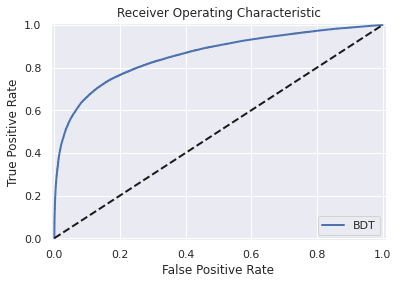

<Figure size 432x288 with 0 Axes>

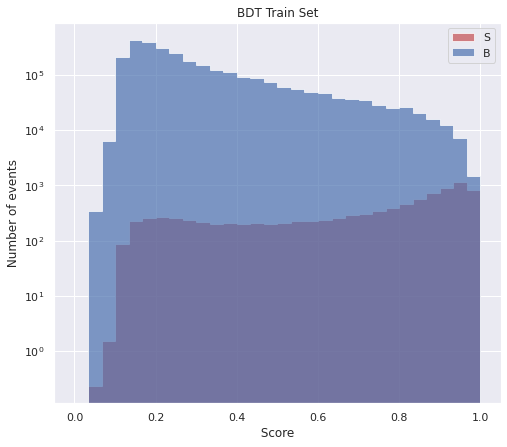

<Figure size 576x504 with 0 Axes>

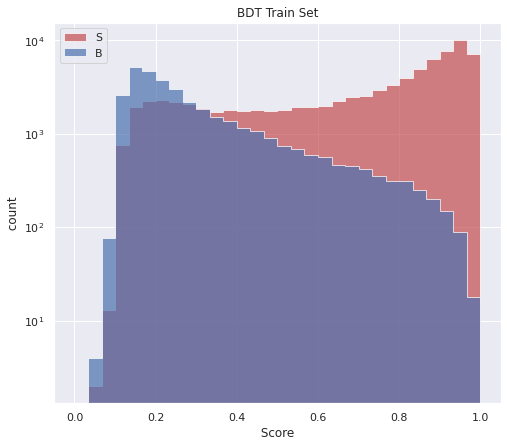

In [14]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


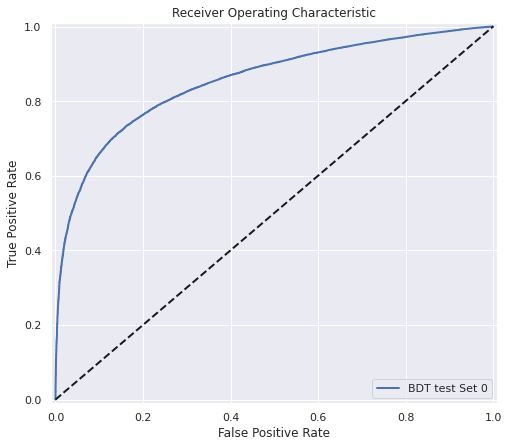

<Figure size 576x504 with 0 Axes>

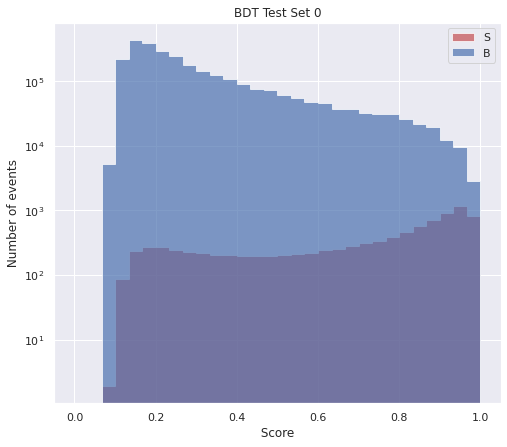

<Figure size 576x504 with 0 Axes>

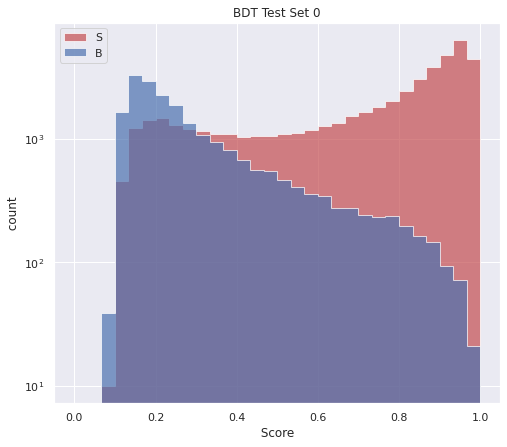

In [15]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

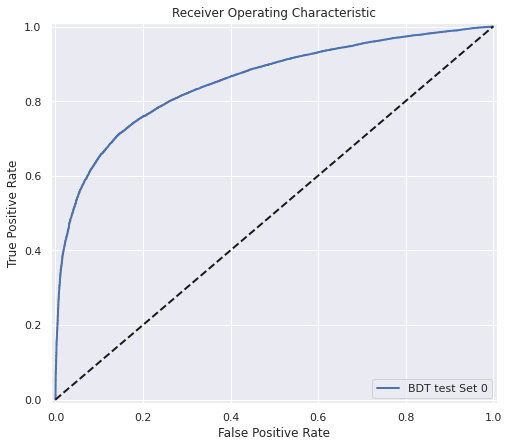

<Figure size 576x504 with 0 Axes>

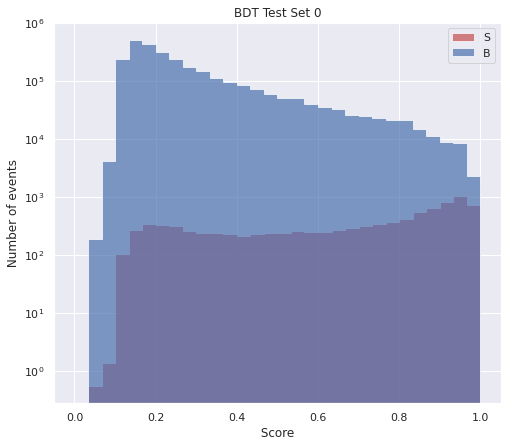

<Figure size 576x504 with 0 Axes>

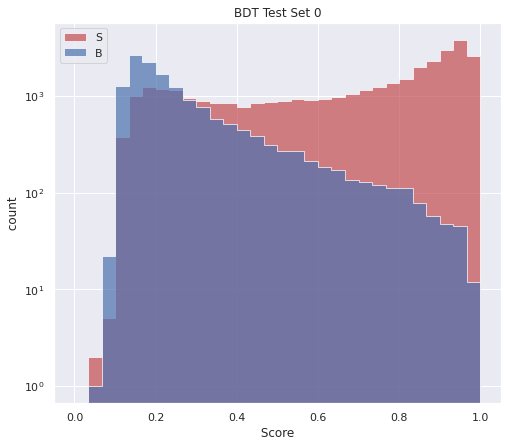

In [16]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [17]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: 18.592706731371766
[*] --- mu_hats (avg): 28.945565515914197

---------------------------------
[✔] Total duration: 0:00:24.520068
---------------------------------


## End